Assignment: PCA Implementation

**Objective:**     
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

**Instructions:**
Download the wine dataset from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Wine).         
Load the dataset into a Pandas dataframe.    
Split the dataset into features and target variables.       
Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.     
Implement PCA on the preprocessed dataset using the scikit-learn library.      
Determine the optimal number of principal components to retain based on the explained variance ratio.        
Visualise the results of PCA using a scatter plot.         
Perform clustering on the PCA-transformed data using K-Means clustering algorithm.      
Interpret the results of PCA and clustering analysis.          

**Deliverables:**    
Jupyter notebook containing the code for the PCA implementation.    
A report summarising the results of PCA and clustering analysis.     
Scatter plot showing the results of PCA.      
A table showing the performance metrics for the clustering algorithm.      

**Additional Information:**   
You can use the python programming language.    
You can use any other machine learning libraries or tools as necessary.    
You can use any visualisation libraries or tools as necessary.     

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
           'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
           'Proanthocyanins', 'Color_intensity', 'Hue',
           'OD280/OD315', 'Proline']
data = pd.read_csv(url, header=None, names=columns)
data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Step 2: Preprocessing
X = data.drop("Class", axis=1)
y = data["Class"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Step 3: PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [5]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

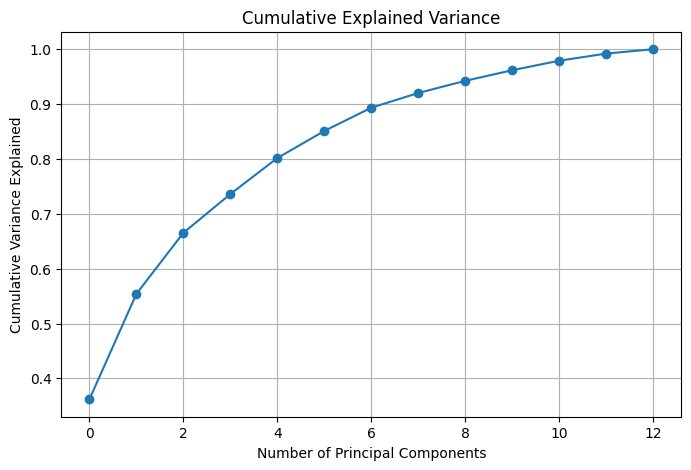

In [6]:
# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid()
plt.show()

In [7]:
# Choose number of components (e.g., 2 for visualization)
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

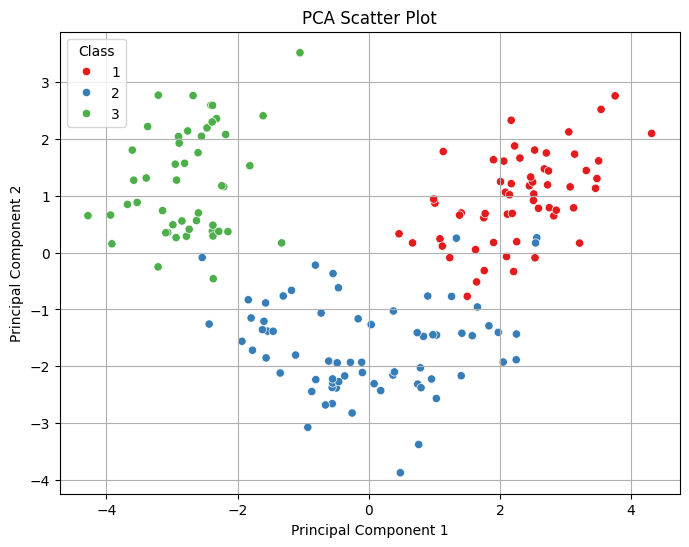

In [8]:
# Step 4: Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="Set1")
plt.title("PCA Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class")
plt.grid()
plt.show()

In [9]:
# Step 5: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_2d)

# Evaluate clustering
silhouette_avg = silhouette_score(X_pca_2d, clusters)

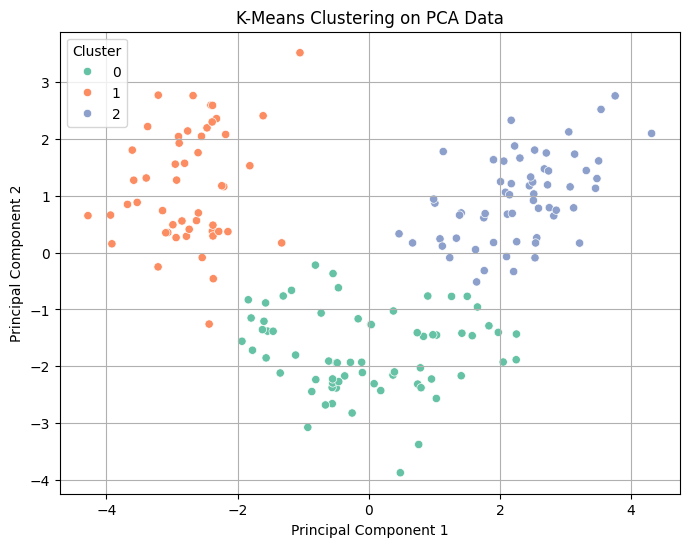

Silhouette Score: 0.56


In [10]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=clusters, palette="Set2")
plt.title("K-Means Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()

print(f"Silhouette Score: {silhouette_avg:.2f}")
